# NFLRadar – Model Predictions Visualization
## Author: Basit Umair
## Description:
This notebook visualizes the model’s output from `out/nfl_predictions.csv`,
focusing on predicted scores, team-level trends, and season-wide patterns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
preds = pd.read_csv("out/nfl_predictions.csv") ## bring in the .csv

preds.head()

,season,week,day,kickoff_at,pred_result,team,opponent,home_away,pred_team_score,pred_opponent_score,...,pred_offense_rushing_yards,pred_offense_turnovers,pred_defense_first_downs_allowed,pred_defense_total_yards_allowed,pred_defense_passing_yards_allowed,pred_defense_rushing_yards_allowed,pred_defense_turnovers_forced,pred_expected_points_offense,pred_expected_points_defense,pred_expected_points_special_teams
0,2025,10.0,Sun,2025-11-09 09:30:00,L,ATL,Indianapolis Colts,@,20.520084,26.004196,...,103.941800,2.107546,20.158905,352.51320,239.49089,119.871260,1.667405,-2.473309,-3.571770,0.446882
1,2025,10.0,Sun,2025-11-09 09:30:00,W,CLT,Atlanta Falcons,NaN,25.259268,19.781698,...,117.976364,1.598801,19.323923,322.29450,217.88666,103.429375,1.959433,3.163202,1.831519,-0.655189
2,2025,10.0,Sun,2025-11-09 13:00:00,W,BUF,Miami Dolphins,@,24.627634,20.827831,...,118.663430,1.728571,17.641108,300.71817,194.05380,112.894516,1.810464,0.060272,6.497629,-1.798958
3,2025,10.0,Sun,2025-11-09 13:00:00,W,CAR,New Orleans Saints,NaN,22.696024,20.123787,...,131.186040,1.756814,17.780548,316.11716,204.36826,111.409740,1.759426,1.535815,2.532504,-0.339438
4,2025,10.0,Sun,2025-11-09 13:00:00,W,CHI,New York Giants,NaN,26.762434,20.756042,...,141.452180,1.852297,19.417646,330.44247,219.81955,113.156300,1.841225,4.515729,-0.258925,-0.434212


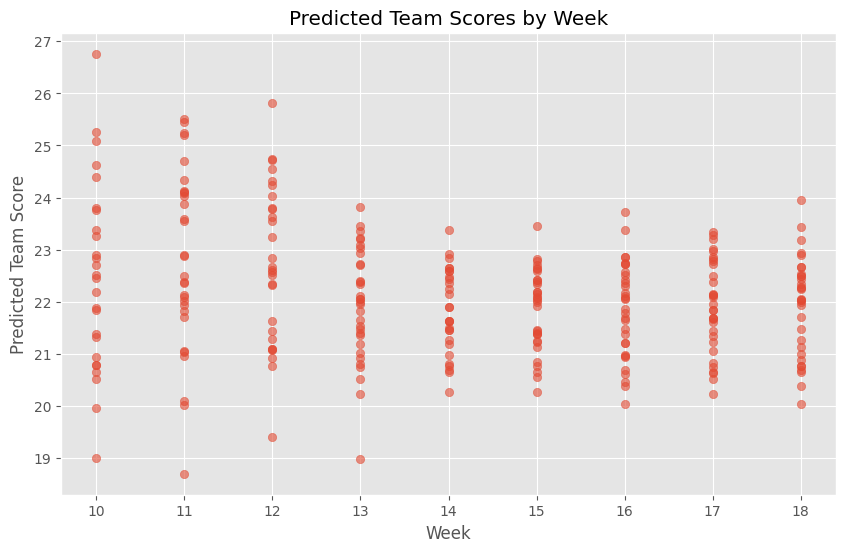

In [2]:
plt.figure(figsize=(10,6))
plt.scatter(preds["week"], preds["pred_team_score"], alpha=0.6) ## scatter graph
plt.title("Predicted Team Scores by Week")
plt.xlabel("Week")
plt.ylabel("Predicted Team Score")
plt.show()

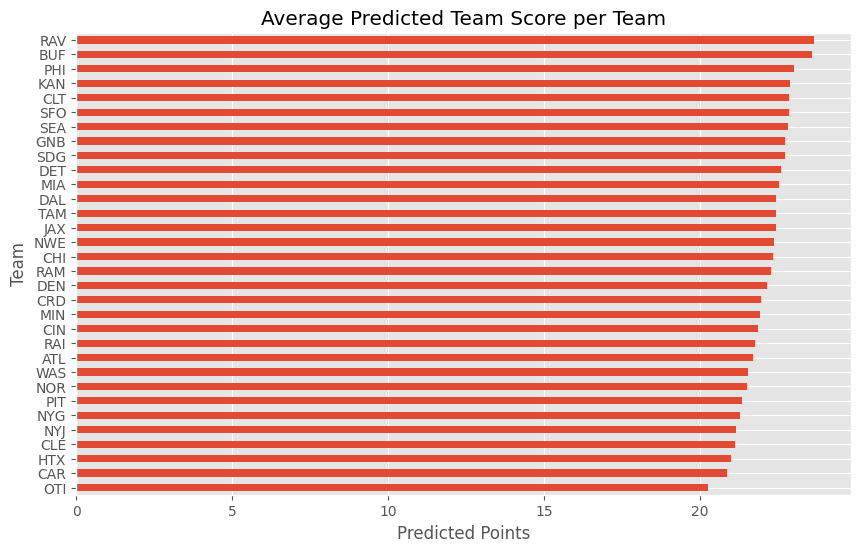

In [3]:
avg_team_scores = preds.groupby("team")["pred_team_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_team_scores.plot(kind="barh") ## horizontal bar graph
plt.title("Average Predicted Team Score per Team")
plt.xlabel("Predicted Points")
plt.ylabel("Team")
plt.gca().invert_yaxis()  ## highest at top
plt.show()

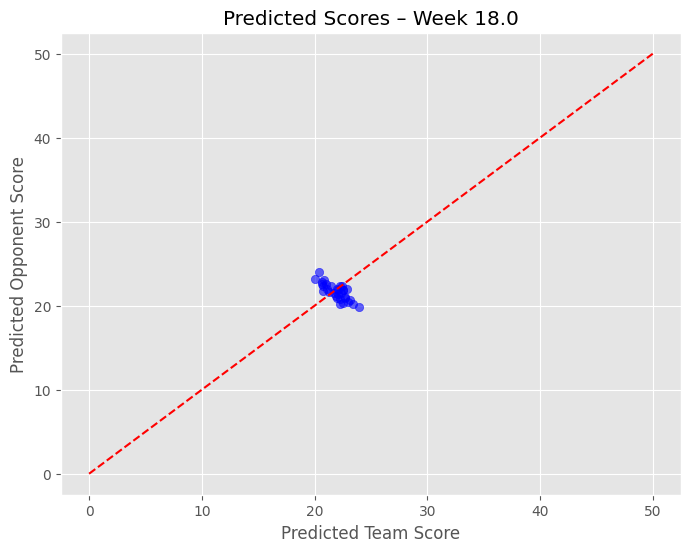

In [4]:
week_to_show = preds["week"].max()  ## show final week

week_data = preds[preds["week"] == week_to_show]

plt.figure(figsize=(8,6))
plt.scatter(week_data["pred_team_score"], week_data["pred_opponent_score"], color="blue", alpha=0.6) ## scatter plot
plt.title(f"Predicted Scores – Week {week_to_show}")
plt.xlabel("Predicted Team Score")
plt.ylabel("Predicted Opponent Score")
plt.plot([0,50], [0,50], 'r--')  ## diagonal reference
plt.show()

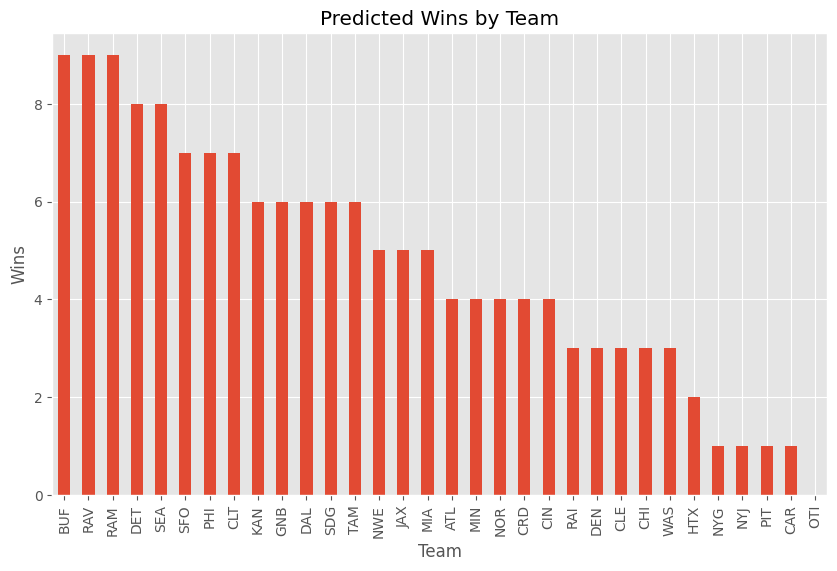

In [5]:
preds["pred_win"] = (preds["pred_team_score"] > preds["pred_opponent_score"]).astype(int)
team_wins = preds.groupby("team")["pred_win"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
team_wins.plot(kind="bar") ## bar graph
plt.title("Predicted Wins by Team")
plt.ylabel("Wins")
plt.xlabel("Team")
plt.show()

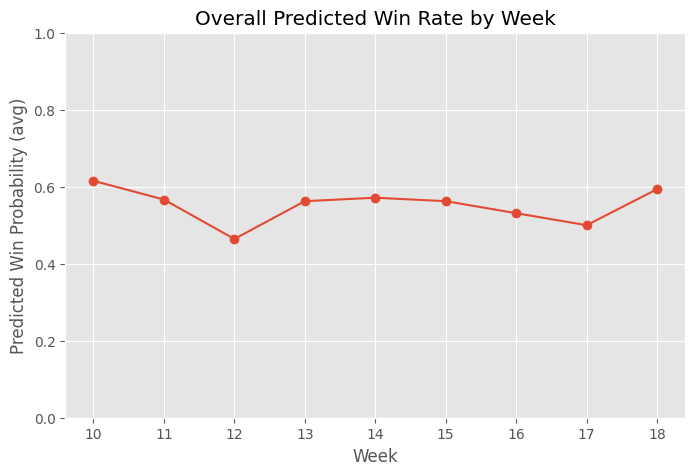

In [6]:
win_rate_by_week = preds.groupby("week")["pred_win"].mean() ## avg win rate

plt.figure(figsize=(8,5))
win_rate_by_week.plot(marker="o") ## plots graph
plt.title("Overall Predicted Win Rate by Week")
plt.xlabel("Week")
plt.ylabel("Predicted Win Probability (avg)")
plt.ylim(0,1)
plt.show()